      ## CLUSTEREING assigment (3 method of clustering in one data set)##

In [6]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [21]:
df=crime.rename(columns={"Unnamed: 0":"city"})

In [8]:
def norm_func(a):
    x=(a-a.min())/(a.max()-a.min())
    return(x)

In [22]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm
df_norm.head(10)


,Murder,Assault,UrbanPop,Rape,new clust
0,0.746988,0.654110,0.440678,0.359173,0.00
1,0.554217,0.746575,0.271186,0.961240,0.75
2,0.439759,0.852740,0.813559,0.612403,0.00
3,0.481928,0.496575,0.305085,0.315245,0.00
4,0.493976,0.791096,1.000000,0.860465,0.00
5,0.427711,0.544521,0.779661,0.811370,1.00
6,0.150602,0.222603,0.762712,0.098191,0.00
7,0.307229,0.660959,0.677966,0.219638,0.25
8,0.879518,0.993151,0.813559,0.635659,0.50
9,1.000000,0.568493,0.474576,0.478036,0.00


In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [23]:
df.shape

(50, 6)

In [24]:
df.columns

Index(['city', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'new clust'], dtype='object')

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(df_norm,method="average",metric="euclidean")
plt.figure(figsize=(15,6))
sch.dendrogram(z,)
plt.show()


In [25]:
from sklearn.cluster import AgglomerativeClustering
h_single=AgglomerativeClustering(n_clusters=5,linkage='single',affinity="euclidean").fit(df_norm)

cluster_labels=pd.Series(h_single.labels_)
cluster_labels
df['new clust']=cluster_labels # create new colum name


In [26]:
df.iloc[:,-1:].groupby(df.city).mean()

# WE display last colum  for comparing univ and clust

,new clust
city,
Alabama,0.0
Alaska,2.0
Arizona,0.0
Arkansas,0.0
California,0.0
Colorado,3.0
Connecticut,0.0
Delaware,4.0
Florida,1.0


In [27]:
df[df['new clust']==0]
# university comes under cluster 0

,city,Murder,Assault,UrbanPop,Rape,new clust
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
6,Connecticut,3.3,110,77,11.1,0
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
12,Illinois,10.4,249,83,24.0,0
13,Indiana,7.2,113,65,21.0,0


# k mean clustering..........2

In [28]:
from sklearn.cluster import KMeans


C:\Users\dell\OneDrive\Documents\ana\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


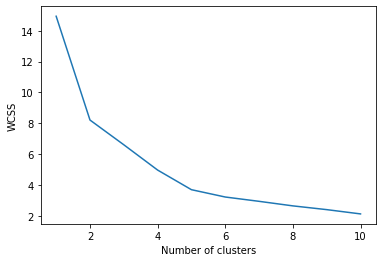

In [29]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss) 
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
clf = KMeans(n_clusters=4)
y_kmeans=clf.fit_predict(df_norm)


In [31]:
y_kmeans
clf.labels_

array([3, 0, 3, 1, 3, 0, 1, 1, 3, 3, 1, 2, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3,
       2, 3, 1, 2, 2, 3, 2, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 3, 1,
       2, 1, 1, 2, 2, 1])

In [32]:
clf.cluster_centers_

array([[0.49096386, 0.64554795, 0.52542373, 0.88630491, 0.875     ],
       [0.31425703, 0.33866058, 0.68361582, 0.31122595, 0.01388889],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868, 0.        ],
       [0.71863926, 0.74435939, 0.62612164, 0.52865177, 0.02941176]])

In [33]:
newdf=pd.Series(y_kmeans)
df['clust']=newdf
df

,city,Murder,Assault,UrbanPop,Rape,new clust,clust
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,2,0
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,0,3
5,Colorado,7.9,204,78,38.7,3,0
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,4,1
8,Florida,15.4,335,80,31.9,1,3
9,Georgia,17.4,211,60,25.8,0,3


In [35]:
df.iloc[:,1:7].groupby(df.city).mean()

,Murder,Assault,UrbanPop,Rape,new clust,clust
city,,,,,,
Alabama,13.2,236.0,58.0,21.2,0.0,3.0
Alaska,10.0,263.0,48.0,44.5,2.0,0.0
Arizona,8.1,294.0,80.0,31.0,0.0,3.0
Arkansas,8.8,190.0,50.0,19.5,0.0,1.0
California,9.0,276.0,91.0,40.6,0.0,3.0
Colorado,7.9,204.0,78.0,38.7,3.0,0.0
Connecticut,3.3,110.0,77.0,11.1,0.0,1.0
Delaware,5.9,238.0,72.0,15.8,4.0,1.0
Florida,15.4,335.0,80.0,31.9,1.0,3.0


In [36]:
plt.style.use(['classic'])
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [37]:
df[df['clust']==1]

,city,Murder,Assault,UrbanPop,Rape,new clust,clust
3,Arkansas,8.8,190,50,19.5,0,1
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,4,1
10,Hawaii,5.3,46,83,20.2,0,1
13,Indiana,7.2,113,65,21.0,0,1
15,Kansas,6.0,115,66,18.0,0,1
20,Massachusetts,4.4,149,85,16.3,0,1
24,Missouri,9.0,178,70,28.2,0,1
29,New Jersey,7.4,159,89,18.8,0,1
34,Ohio,7.3,120,75,21.4,0,1


#           DBSCAN.......3

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [41]:
df.drop(['city'],axis=1,inplace=True)

In [42]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   3. ],
       [ 10. , 263. ,  48. ,  44.5,   2. ,   0. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ,   3. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   1. ],
       [  9. , 276. ,  91. ,  40.6,   0. ,   3. ],
       [  7.9, 204. ,  78. ,  38.7,   3. ,   0. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   1. ],
       [  5.9, 238. ,  72. ,  15.8,   4. ,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ,   3. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   3. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   1. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ,   3. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ,   2. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   2. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   3. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ,   2. ],
       [ 11.3, 300. ,  67. ,  2

In [48]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)



In [62]:
X 

array([[ 1.25517927e+00,  7.90787158e-01, -5.26195142e-01,
        -3.45115891e-03, -2.67261242e-01,  1.19311752e+00],
       [ 5.13018579e-01,  1.11805959e+00, -1.22406668e+00,
         2.50942392e+00,  2.40535118e+00, -2.06083935e+00],
       [ 7.23606675e-02,  1.49381682e+00,  1.00912225e+00,
         1.05346626e+00, -2.67261242e-01,  1.19311752e+00],
       [ 2.34708319e-01,  2.33211909e-01, -1.08449238e+00,
        -1.86793976e-01, -2.67261242e-01, -9.76187060e-01],
       [ 2.81093362e-01,  1.27563520e+00,  1.77678094e+00,
         2.08881393e+00, -2.67261242e-01,  1.19311752e+00],
       [ 2.59756242e-02,  4.02908724e-01,  8.69547941e-01,
         1.88390137e+00,  3.74165739e+00, -2.06083935e+00],
       [-1.04088037e+00, -7.36484178e-01,  7.99760786e-01,
        -1.09272319e+00, -2.67261242e-01, -9.76187060e-01],
       [-4.37874809e-01,  8.15029561e-01,  4.50825016e-01,
        -5.85834225e-01,  5.07796360e+00, -9.76187060e-01],
       [ 1.76541475e+00,  1.99078607e+00,  1.009

In [50]:
dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan.fit(X)

DBSCAN(min_samples=6)

In [51]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [52]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [53]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [54]:
pd.concat([df,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,new clust,clust,cluster
0,13.2,236,58,21.2,0,3,-1
1,10.0,263,48,44.5,2,0,-1
2,8.1,294,80,31.0,0,3,-1
3,8.8,190,50,19.5,0,1,-1
4,9.0,276,91,40.6,0,3,-1
5,7.9,204,78,38.7,3,0,-1
6,3.3,110,77,11.1,0,1,-1
7,5.9,238,72,15.8,4,1,-1
8,15.4,335,80,31.9,1,3,-1
9,17.4,211,60,25.8,0,3,-1
